In [1]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset

df = pd.read_csv('now_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Questions
- Do younger people tend to miss appointments more than older people? if so, break it down by gender.
- Will having a scholarship(brasil welfare system) increase likelihood of showing up?
- Will having a pre-existing condition increase likelihood of showing up?
- Will sending an early sms message before appointment increase likelihood of showing up?

## Assesing Data

In [2]:
# dataframe shape
df.shape

# 110527 rows and 14 features

(110527, 14)

In [3]:
# number of duplicate rows
df.duplicated().sum()

# there are no duplicate rows

0

In [4]:
# features datatypes
df.dtypes

# apart from dates that are object type, all other features have correct datatypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# features with missing columns
df.isnull().sum()

# no missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# number of unique values per feature
df.nunique()

# looking at unique values, appointmentday and handcap come off as strange and needing further look

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Clean Data

In [7]:
# drop unnecesary columns
df.drop(['PatientId', 'Neighbourhood'], axis=1, inplace=True)

In [8]:
# lowercase all features and correct spellings
df.columns = df.columns.str.lower()
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap', 'no-show':'no_show'}, inplace=True)

In [9]:
# check
df.head(3)

,appointmentid,gender,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No


In [10]:
# drop appoitmentid as well
df.drop('appointmentid', axis=1, inplace=True)

In [11]:
# check
df.head(3)

,gender,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No


In [12]:
# basic stats shows that age has a negative number value as handicap having a max value of 4 which is wrong
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# filter out wrong age values
df = df.query('age >= 0')

In [14]:
# check
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [15]:
# extract meaningful data from scheduledday and appointmentday
df['scheduledday'] = df['scheduledday'].str[:10]
df['appointmentday'] = df['appointmentday'].str[:10]

In [16]:
# check
df.head(3)

,gender,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No


In [17]:
# theres a list of dated when appointmentday is behind scheduledday which makes no sense, so i'll drop it
df.query('appointmentday < scheduledday')

,gender,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,M,2016-05-10,2016-05-09,38,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,0,0,0,0,0,0,Yes


In [18]:
df = df.query('appointmentday >= scheduledday')

In [19]:
# check
df.query('appointmentday < scheduledday')

,gender,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


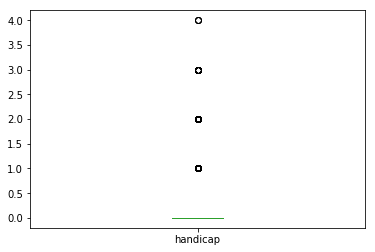

In [22]:
# handicap has 5 values
df['handicap'].plot(kind='box');

In [24]:
df['handicap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handicap, dtype: int64

In [25]:
# I'm assuming the values for handicap is just like other pre-existing conditions where
# its 0 if negative and 1 if positive, so i'll drop the wrong values which account for small portion of total
df = df.query('handicap <= 1')

In [26]:
# check
df['handicap'].describe()

count    110322.000000
mean          0.018491
std           0.134720
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: handicap, dtype: float64